In [324]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import math
import matplotlib.lines as mlines
import os
import cv2 as cv
from IPython.display import Video
import matplotlib.cm as cm
import matplotlib.animation as animation
import matplotlib.image as mpimg
from statistics import mean
from scipy.optimize import curve_fit
from matplotlib.pyplot import figure
import pandas as pd

In [325]:
waves = np.linspace(7,13,120)

def pixel_registration(array,cal_file,waves,ymin,ymax):
    #import cal file
    with h5py.File(cal_file, "r") as h5:

        fit = np.array(h5.get('/pixel_registration/fitparams'))
        ROI = np.array(h5.get('/pixel_registration/ROI'))

    array=array[ymin:ymax,ROI[0]:ROI[1]]
    
    new = np.zeros([len(array),len(waves)])
    for i in range(len(array)):
        for l in range(len(waves)):    
            w=  waves[l]
            j = int(round(f(w,fit[0],fit[1])))
            values = array[i,j-1:j+1]
            value = np.mean(values)
            new[i,l] = value
    return(new)


In [326]:
save_path_23 = 'C://Users//khart//Documents//Summer2022Campaign//IRCSP2//Calibration//5.29.2022//ackoffset//enclosure_at_23C//50C//'
meas = np.arange(0,55,1)
nummeas = len(meas)
imgs1_23 = np.empty([nummeas,10,256,320])
imgs2_23 = np.empty([nummeas,10,256,320])
t1 = np.empty([nummeas])
t2 = np.empty([nummeas])

for i in range(nummeas):
    with h5py.File(save_path_23 + 'Camera1_Capture_'+ str(meas[i])+ '.h5', "r") as f:
        # List all groups
       # print(f.keys())
        #print(f.attrs.keys())

        imgs1_23[i,:,:] = np.array(f[list(f.keys())[0]])
        t1[i] = np.array(f[list(f.keys())[1]])

for i in range(nummeas):
    with h5py.File(save_path_23 + 'Camera2_Capture_'+ str(meas[i])+ '.h5', "r") as f:
        # List all groups
       # print(f.keys())
        #print(f.attrs.keys())

        imgs2_23[i,:,:] = np.array(f[list(f.keys())[0]])
        t2[i] = np.array(f[list(f.keys())[1]])

In [367]:
save_path_20 = 'C://Users//khart//Documents//Summer2022Campaign//IRCSP2//Calibration//5.29.2022//ackoffset//enclosure_at_20C//50C//'
meas = np.arange(0,56,1)
nummeas = len(meas)
imgs1_20 = np.empty([nummeas,1,256,320])
imgs2_20 = np.empty([nummeas,1,256,320])
t1 = np.empty([nummeas])
t2 = np.empty([nummeas])

for i in range(nummeas):
    try:
        with h5py.File(save_path_20 + 'meas_'+ str(meas[i])+ '.h5', "r") as f:
            # List all groups
            #print(f.keys())
            #print(f.attrs.keys())

            imgs1_20[i,:,:] = np.array(f[list(f.keys())[0]])
            imgs2_20[i,:,:] = np.array(f[list(f.keys())[1]])
            t1[i] = np.array(f[list(f.keys())[2]])
            t2[i] = np.array(f[list(f.keys())[3]])
    except:
        print(meas[i])

        
save_path_25 = 'C://Users//khart//Documents//Summer2022Campaign//IRCSP2//Calibration//5.29.2022//ackoffset//enclosure_at_25C//50C//'
meas = np.arange(0,56,1)
nummeas = len(meas)
imgs1_25 = np.empty([nummeas,1,256,320])
imgs2_25 = np.empty([nummeas,1,256,320])
t1 = np.empty([nummeas])
t2 = np.empty([nummeas])

for i in range(nummeas):
    try:
        with h5py.File(save_path_25 + 'meas_'+ str(meas[i])+ '.h5', "r") as f:
            # List all groups
            #print(f.keys())
            #print(f.attrs.keys())

            imgs1_25[i,:,:] = np.array(f[list(f.keys())[0]])
            imgs2_25[i,:,:] = np.array(f[list(f.keys())[1]])
            t1[i] = np.array(f[list(f.keys())[2]])
            t2[i] = np.array(f[list(f.keys())[3]])
    except:
        print(meas[i])
        
telem_df_9 = pd.read_csv(save_path_9+'telemetry.csv',header = None)
telem_df_20 = pd.read_csv(save_path_20+'telemetry.csv',header = None)
telem_df_25 = pd.read_csv(save_path_25+'telemetry.csv',header = None)

0
1
2
3
4
5
6
7


In [368]:
#cal_file1 = 'C://Users//khart//Documents//Summer2022Campaign//IRCSP2//Calibration//5.29.2022//cam1pixel.h5'
#cal_file2 = 'C://Users//khart//Documents//Summer2022Campaign//IRCSP2//Calibration//5.29.2022//cam2pixel.h5'

#im2_20 = pixel_registration(im1_20[5],cal_file1,waves,0,256)

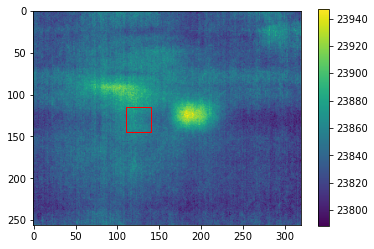

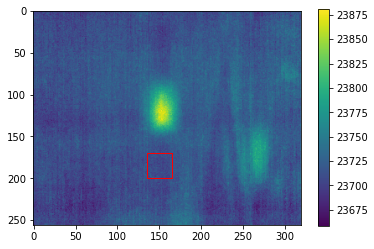

In [329]:
plt.imshow(imgs2_23[0,0])
rect = patches.Rectangle((110, 115), 30, 30, linewidth=1, edgecolor='r', facecolor='none')
#rect_active= patches.Rectangle((165, 105), 50, 40, linewidth=1, edgecolor='r', facecolor='none')

plt.gca().add_patch(rect)

plt.colorbar()
plt.show()
plt.imshow(imgs1_23[0,0])
rect = patches.Rectangle((135, 170), 30, 30, linewidth=1, edgecolor='r', facecolor='none')
#rect_active = patches.Rectangle((133, 92), 40, 50, linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)
plt.colorbar()
plt.show()



In [369]:
im2_23 = imgs2_23[:,0,105:145,165:215]
im2_23 = im2_23.transpose()

im1_23 = imgs1_23[:,0,92:142,133:173]
im1_23 = im1_23.transpose()

ak1_23 = imgs1_23[:,0,170:200,135:170]
ak1_23 = ak1_23.transpose()

ak2_23 = imgs2_23[:,0,115:145,110:140]
ak2_23 = ak2_23.transpose()


ack2_23  =ak2_23.sum(axis=tuple(range(ak2_23.ndim - 1)))
ack1_23  = ak1_23.sum(axis=tuple(range(ak1_23.ndim - 1)))
active2_23 =im2_23.sum(axis=tuple(range(im2_23.ndim - 1)))
active1_23 =im1_23.sum(axis=tuple(range(im1_23.ndim - 1)))

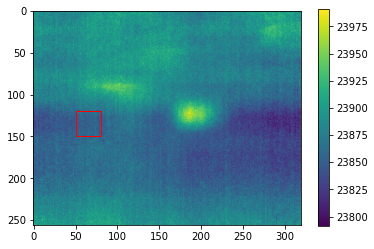

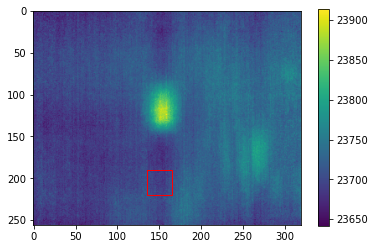

In [370]:
plt.imshow(imgs2_20[8,0])
#acktar
rect = patches.Rectangle((50, 120), 30, 30, linewidth=1, edgecolor='r', facecolor='none')
#active
#rect = patches.Rectangle((170, 100), 50, 50, linewidth=1, edgecolor='r', facecolor='none')


plt.gca().add_patch(rect)

plt.colorbar()
plt.show()
plt.imshow(imgs1_20[8,0])
#acktar
rect = patches.Rectangle((135, 190), 30, 30, linewidth=1, edgecolor='r', facecolor='none')
#active
#rect = patches.Rectangle((133, 90), 40, 50, linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)
plt.colorbar()
plt.show()

In [371]:
im2_20 = imgs2_20[:,0,100:150,170:220]
im2_20 = im2_20.transpose()

im2_25 = imgs2_25[:,0,100:150,170:220]
im2_25 = im2_25.transpose()

im1_20 = imgs1_20[:,0,90:150,133:180]
im1_20 = im1_20.transpose()

im1_25 = imgs1_25[:,0,90:150,133:180]
im1_25 = im1_25.transpose()

ak1_20 = imgs1_20[:,0,190:210,135:165]
ak1_20 = ak1_20.transpose()

ak1_25 = imgs1_25[:,0,190:210,135:165]
ak1_25 = ak1_25.transpose()

ak2_20 = imgs2_20[:,0,120:150,50:80]
ak2_20 = ak2_20.transpose()

ak2_25 = imgs2_25[:,0,120:150,50:80]
ak2_25 = ak2_25.transpose()

ack2_20  =ak2_20.sum(axis=tuple(range(ak2_20.ndim - 1)))
ack1_20  = ak1_20.sum(axis=tuple(range(ak1_20.ndim - 1)))
active2_20 =im2_20.sum(axis=tuple(range(im2_20.ndim - 1)))
active1_20 =im1_20.sum(axis=tuple(range(im1_20.ndim - 1)))
ack2_25  =ak2_25.sum(axis=tuple(range(ak2_25.ndim - 1)))
ack1_25  = ak1_25.sum(axis=tuple(range(ak1_25.ndim - 1)))
active2_25 =im2_25.sum(axis=tuple(range(im2_25.ndim - 1)))
active1_25 =im1_25.sum(axis=tuple(range(im1_25.ndim - 1)))

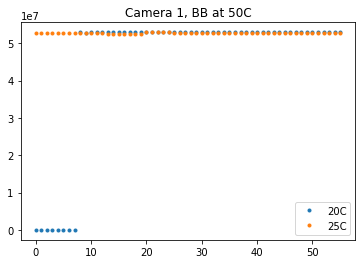

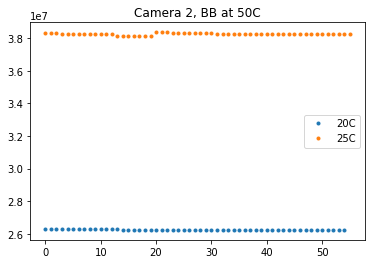

In [373]:
ack2_20  =ak2_20.sum(axis=tuple(range(ak2_20.ndim - 1)))
ack1_20  = ak1_20.sum(axis=tuple(range(ak1_20.ndim - 1)))
active2_20 =im2_20.sum(axis=tuple(range(im2_20.ndim - 1)))
active1_20 =im1_20.sum(axis=tuple(range(im1_20.ndim - 1)))


plt.plot(active1_20[:]-ack1_20[:],'.', label = '20C')
plt.plot(active1_25[:]-ack1_25[:],'.', label = '25C')
#plt.plot(active1_23[25:]-ack1_23[25:],'.', label = '23C')
plt.legend()
plt.title('Camera 1, BB at 50C')
#plt.ylim(5e7,5.4e7)
plt.show()
plt.plot(active2_23[:]-ack2_23[:],'.', label = '20C')
plt.plot(active2_25[:]-ack2_25[:],'.', label = '25C')
#plt.plot(active2_23[25:]-ack2_23[25:],'.', label = '23C')
plt.title('Camera 2, BB at 50C')
#plt.ylim(6.1e7,6.25e7)
plt.legend()
plt.show()

In [338]:
diff1 = (active1_25[25:53]-ack1_25[25:53]) - (active1_20[25:53]-ack1_20[25:53])
diff1_50 = np.mean(diff1)
diff1_50
diff2 = (active2_25[25:53]-ack2_25[25:53]) - (active2_20[25:53]-ack2_20[25:53])
diff2_50 = np.mean(diff2)
diff2_50

6274.142857142857

In [339]:
save_path_23 = 'C://Users//khart//Documents//Summer2022Campaign//IRCSP2//Calibration//5.29.2022//ackoffset//enclosure_at_23C//40C//'
meas = np.arange(0,55,1)
nummeas = len(meas)
imgs1_23 = np.empty([nummeas,10,256,320])
imgs2_23 = np.empty([nummeas,10,256,320])
t1 = np.empty([nummeas])
t2 = np.empty([nummeas])

for i in range(nummeas):
    with h5py.File(save_path_23 + 'Camera1_Capture_'+ str(meas[i])+ '.h5', "r") as f:
        # List all groups
       # print(f.keys())
        #print(f.attrs.keys())

        imgs1_23[i,:,:] = np.array(f[list(f.keys())[0]])
        t1[i] = np.array(f[list(f.keys())[1]])

for i in range(nummeas):
    with h5py.File(save_path_23 + 'Camera2_Capture_'+ str(meas[i])+ '.h5', "r") as f:
        # List all groups
       # print(f.keys())
        #print(f.attrs.keys())

        imgs2_23[i,:,:] = np.array(f[list(f.keys())[0]])
        t2[i] = np.array(f[list(f.keys())[1]])

In [340]:
save_path_20 = 'C://Users//khart//Documents//Summer2022Campaign//IRCSP2//Calibration//5.29.2022//ackoffset//enclosure_at_20C//40C//'
meas = np.arange(0,56,1)
nummeas = len(meas)
imgs1_20 = np.empty([nummeas,1,256,320])
imgs2_20 = np.empty([nummeas,1,256,320])
t1 = np.empty([nummeas])
t2 = np.empty([nummeas])

for i in range(nummeas):
    try:
        with h5py.File(save_path_20 + 'meas_'+ str(meas[i])+ '.h5', "r") as f:
            # List all groups
            #print(f.keys())
            #print(f.attrs.keys())

            imgs1_20[i,:,:] = np.array(f[list(f.keys())[0]])
            imgs2_20[i,:,:] = np.array(f[list(f.keys())[1]])
            t1[i] = np.array(f[list(f.keys())[2]])
            t2[i] = np.array(f[list(f.keys())[3]])
    except:
        print(meas[i])


52
54
55


In [341]:
save_path_25 = 'C://Users//khart//Documents//Summer2022Campaign//IRCSP2//Calibration//5.29.2022//ackoffset//enclosure_at_25C//40C//'
meas = np.arange(0,56,1)
nummeas = len(meas)
imgs1_25 = np.empty([nummeas,1,256,320])
imgs2_25 = np.empty([nummeas,1,256,320])
t1 = np.empty([nummeas])
t2 = np.empty([nummeas])

for i in range(nummeas):
    try:
        with h5py.File(save_path_25 + 'meas_'+ str(meas[i])+ '.h5', "r") as f:
            # List all groups
            #print(f.keys())
            #print(f.attrs.keys())

            imgs1_25[i,:,:] = np.array(f[list(f.keys())[0]])
            imgs2_25[i,:,:] = np.array(f[list(f.keys())[1]])
            t1[i] = np.array(f[list(f.keys())[2]])
            t2[i] = np.array(f[list(f.keys())[3]])
    except:
        print(meas[i])


55


In [342]:
telem_df_9 = pd.read_csv(save_path_9+'telemetry.csv',header = None)
telem_df_20 = pd.read_csv(save_path_20+'telemetry.csv',header = None)
telem_df_25 = pd.read_csv(save_path_25+'telemetry.csv',header = None)

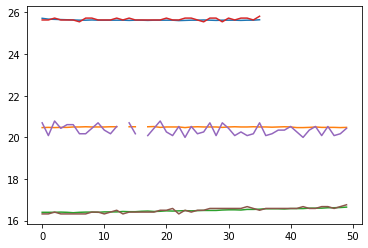

In [343]:
plt.plot(telem_df_25[2][:50])
plt.plot(telem_df_20[2][:50])
plt.plot(telem_df_9[2][:50])
plt.plot(telem_df_25[6][:50])
plt.plot(telem_df_20[6][:50])
plt.plot(telem_df_9[6][:50])


In [344]:
im2_23 = imgs2_23[:,0,105:145,165:215]
im2_23 = im2_23.transpose()

im1_23 = imgs1_23[:,0,92:142,133:173]
im1_23 = im1_23.transpose()

ak1_23 = imgs1_23[:,0,170:200,135:170]
ak1_23 = ak1_23.transpose()

ak2_23 = imgs2_23[:,0,115:145,110:140]
ak2_23 = ak2_23.transpose()


ack2_23  =ak2_23.sum(axis=tuple(range(ak2_23.ndim - 1)))
ack1_23  = ak1_23.sum(axis=tuple(range(ak1_23.ndim - 1)))
active2_23 =im2_23.sum(axis=tuple(range(im2_23.ndim - 1)))
active1_23 =im1_23.sum(axis=tuple(range(im1_23.ndim - 1)))

In [345]:
im2_20 = imgs2_20[:,0,100:150,170:220]
im2_20 = im2_20.transpose()

im2_25 = imgs2_25[:,0,100:150,170:220]
im2_25 = im2_25.transpose()

im1_20 = imgs1_20[:,0,90:150,133:180]
im1_20 = im1_20.transpose()

im1_25 = imgs1_25[:,0,90:150,133:180]
im1_25 = im1_25.transpose()

ak1_20 = imgs1_20[:,0,190:210,135:165]
ak1_20 = ak1_20.transpose()

ak1_25 = imgs1_25[:,0,190:210,135:165]
ak1_25 = ak1_25.transpose()

ak2_20 = imgs2_20[:,0,120:150,50:80]
ak2_20 = ak2_20.transpose()

ak2_25 = imgs2_25[:,0,120:150,50:80]
ak2_25 = ak2_25.transpose()

ack2_20  =ak2_20.sum(axis=tuple(range(ak2_20.ndim - 1)))
ack1_20  = ak1_20.sum(axis=tuple(range(ak1_20.ndim - 1)))
active2_20 =im2_20.sum(axis=tuple(range(im2_20.ndim - 1)))
active1_20 =im1_20.sum(axis=tuple(range(im1_20.ndim - 1)))
ack2_25  =ak2_25.sum(axis=tuple(range(ak2_25.ndim - 1)))
ack1_25  = ak1_25.sum(axis=tuple(range(ak1_25.ndim - 1)))
active2_25 =im2_25.sum(axis=tuple(range(im2_25.ndim - 1)))
active1_25 =im1_25.sum(axis=tuple(range(im1_25.ndim - 1)))

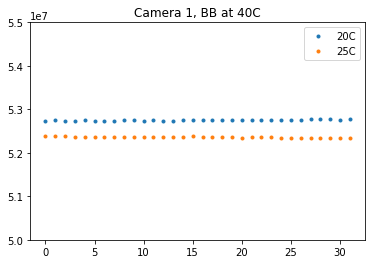

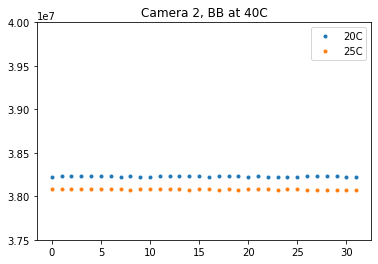

In [350]:
ack2_20  =ak2_20.sum(axis=tuple(range(ak2_20.ndim - 1)))
ack1_20  = ak1_20.sum(axis=tuple(range(ak1_20.ndim - 1)))
active2_20 =im2_20.sum(axis=tuple(range(im2_20.ndim - 1)))
active1_20 =im1_20.sum(axis=tuple(range(im1_20.ndim - 1)))


plt.plot(active1_20[20:52]-ack1_20[20:52],'.', label = '20C')
plt.plot(active1_25[20:52]-ack1_25[20:52],'.', label = '25C')
#plt.plot(active1_23[20:]-ack1_23[20:],'.', label = '23C')
plt.legend()
plt.title('Camera 1, BB at 40C')
plt.ylim(5e7,5.5e7)
plt.show()
plt.plot(active2_20[20:52]-ack2_20[20:52],'.', label = '20C')
plt.plot(active2_25[20:52]-ack2_25[20:52],'.', label = '25C')
#plt.plot(active2_23[20:]-ack2_23[20:],'.', label = '23C')
plt.title('Camera 2, BB at 40C')
plt.ylim(3.75e7,4e7)
plt.legend()
plt.show()

In [353]:
diff1 = (active1_25[25:53]-ack1_25[25:53]) - (active1_20[25:53]-ack1_20[25:53])
diff1_40 = np.mean(diff1)
diff1_40
diff2 = (active2_25[25:53]-ack2_25[25:53]) - (active2_20[25:53]-ack2_20[25:53])
diff2_40 = np.mean(diff2)
diff2_40

1214809.0357142857

In [354]:
save_path_23 = 'C://Users//khart//Documents//Summer2022Campaign//IRCSP2//Calibration//5.29.2022//ackoffset//enclosure_at_23C//50C//'
meas = np.arange(0,55,1)
nummeas = len(meas)
imgs1_23 = np.empty([nummeas,10,256,320])
imgs2_23 = np.empty([nummeas,10,256,320])
t1 = np.empty([nummeas])
t2 = np.empty([nummeas])

for i in range(nummeas):
    with h5py.File(save_path_23 + 'Camera1_Capture_'+ str(meas[i])+ '.h5', "r") as f:
        # List all groups
       # print(f.keys())
        #print(f.attrs.keys())

        imgs1_23[i,:,:] = np.array(f[list(f.keys())[0]])
        t1[i] = np.array(f[list(f.keys())[1]])

for i in range(nummeas):
    with h5py.File(save_path_23 + 'Camera2_Capture_'+ str(meas[i])+ '.h5', "r") as f:
        # List all groups
       # print(f.keys())
        #print(f.attrs.keys())

        imgs2_23[i,:,:] = np.array(f[list(f.keys())[0]])
        t2[i] = np.array(f[list(f.keys())[1]])

        
        
save_path_20 = 'C://Users//khart//Documents//Summer2022Campaign//IRCSP2//Calibration//5.29.2022//ackoffset//enclosure_at_20C//30C//'
meas = np.arange(0,56,1)
nummeas = len(meas)
imgs1_20 = np.empty([nummeas,1,256,320])
imgs2_20 = np.empty([nummeas,1,256,320])
t1 = np.empty([nummeas])
t2 = np.empty([nummeas])

for i in range(nummeas):
    try:
        with h5py.File(save_path_20 + 'meas_'+ str(meas[i])+ '.h5', "r") as f:
            # List all groups
            #print(f.keys())
            #print(f.attrs.keys())

            imgs1_20[i,:,:] = np.array(f[list(f.keys())[0]])
            imgs2_20[i,:,:] = np.array(f[list(f.keys())[1]])
            t1[i] = np.array(f[list(f.keys())[2]])
            t2[i] = np.array(f[list(f.keys())[3]])
    except:
        print(meas[i])

        
save_path_25 = 'C://Users//khart//Documents//Summer2022Campaign//IRCSP2//Calibration//5.29.2022//ackoffset//enclosure_at_25C//30C//'
meas = np.arange(0,56,1)
nummeas = len(meas)
imgs1_25 = np.empty([nummeas,1,256,320])
imgs2_25 = np.empty([nummeas,1,256,320])
t1 = np.empty([nummeas])
t2 = np.empty([nummeas])

for i in range(nummeas):
    try:
        with h5py.File(save_path_25 + 'meas_'+ str(meas[i])+ '.h5', "r") as f:
            # List all groups
            #print(f.keys())
            #print(f.attrs.keys())

            imgs1_25[i,:,:] = np.array(f[list(f.keys())[0]])
            imgs2_25[i,:,:] = np.array(f[list(f.keys())[1]])
            t1[i] = np.array(f[list(f.keys())[2]])
            t2[i] = np.array(f[list(f.keys())[3]])
    except:
        print(meas[i])
        
telem_df_9 = pd.read_csv(save_path_9+'telemetry.csv',header = None)
telem_df_20 = pd.read_csv(save_path_20+'telemetry.csv',header = None)
telem_df_25 = pd.read_csv(save_path_25+'telemetry.csv',header = None)

53
55


In [374]:
tuple(range(ak2_23.ndim - 1))

(0, 1)

In [377]:
im2_23 = imgs2_23[:,0,105:145,165:215]
im2_23 = im2_23.transpose()

im1_23 = imgs1_23[:,0,92:142,133:173]
im1_23 = im1_23.transpose()

ak1_23 = imgs1_9[:,0,170:200,135:170]
ak1_23 = ak1_9.transpose()

ak2_23 = imgs2_23[:,0,115:145,110:140]
ak2_23 = ak2_23.transpose()

#ack2_23  =ak2_23.sum(axis=0)

ack2_23  =ak2_23.sum(axis=tuple(range(ak2_23.ndim - 1)))
#ack1_23  = ak1_23.sum(axis=tuple(range(ak1_23.ndim - 1)))
#active2_23 =im2_23.sum(axis=tuple(range(im2_23.ndim - 1)))
#active1_23 =im1_23.sum(axis=tuple(range(im1_23.ndim - 1)))

In [378]:
ack2_23

array([21476243., 21469703., 21467408., 21467253., 21460651., 21459653.,
       21456795., 21452889., 21450739., 21448840., 21444975., 21447984.,
       21446387., 21444560., 21441753., 21440569., 21441179., 21440076.,
       21437417., 21435090., 21436124., 21432727., 21432955., 21432451.,
       21431694., 21431842., 21429295., 21430646., 21429523., 21428659.,
       21430781., 21425977., 21429104., 21425553., 21425788., 21427070.,
       21425471., 21425289., 21423709., 21425251., 21424666., 21430494.,
       21425082., 21424301., 21428281., 21425799., 21428939., 21425633.,
       21425682., 21424527., 21422970., 21424532., 21424338., 21426761.,
       21427441.])

In [356]:
im2_20 = imgs2_20[:,0,100:150,170:220]
im2_20 = im2_20.transpose()

im2_25 = imgs2_25[:,0,100:150,170:220]
im2_25 = im2_25.transpose()

im1_20 = imgs1_20[:,0,90:150,133:180]
im1_20 = im1_20.transpose()

im1_25 = imgs1_25[:,0,90:150,133:180]
im1_25 = im1_25.transpose()

ak1_20 = imgs1_20[:,0,190:210,135:165]
ak1_20 = ak1_20.transpose()

ak1_25 = imgs1_25[:,0,190:210,135:165]
ak1_25 = ak1_25.transpose()

ak2_20 = imgs2_20[:,0,120:150,50:80]
ak2_20 = ak2_20.transpose()

ak2_25 = imgs2_25[:,0,120:150,50:80]
ak2_25 = ak2_25.transpose()

ack2_20  =ak2_20.sum(axis=tuple(range(ak2_20.ndim - 1)))
ack1_20  = ak1_20.sum(axis=tuple(range(ak1_20.ndim - 1)))
active2_20 =im2_20.sum(axis=tuple(range(im2_20.ndim - 1)))
active1_20 =im1_20.sum(axis=tuple(range(im1_20.ndim - 1)))
ack2_25  =ak2_25.sum(axis=tuple(range(ak2_25.ndim - 1)))
ack1_25  = ak1_25.sum(axis=tuple(range(ak1_25.ndim - 1)))
active2_25 =im2_25.sum(axis=tuple(range(im2_25.ndim - 1)))
active1_25 =im1_25.sum(axis=tuple(range(im1_25.ndim - 1)))

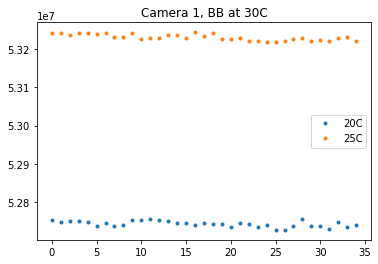

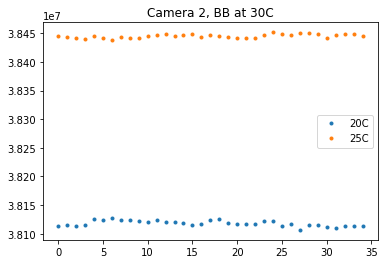

In [358]:
ack2_20  =ak2_20.sum(axis=tuple(range(ak2_20.ndim - 1)))
ack1_20  = ak1_20.sum(axis=tuple(range(ak1_20.ndim - 1)))
active2_20 =im2_20.sum(axis=tuple(range(im2_20.ndim - 1)))
active1_20 =im1_20.sum(axis=tuple(range(im1_20.ndim - 1)))


plt.plot(active1_20[:35]-ack1_20[:35],'.', label = '20C')
plt.plot(active1_25[:35]-ack1_25[:35],'.', label = '25C')
#plt.plot(active1_23[:35]-ack1_23[:35],'.', label = '23C')
plt.legend()
plt.title('Camera 1, BB at 30C')
plt.show()
plt.plot(active2_20[:35]-ack2_20[:35],'.', label = '20C')
plt.plot(active2_25[:35]-ack2_25[:35],'.', label = '25C')
#plt.plot(active2_23[:35]-ack2_23[:35],'.', label = '23C')
plt.title('Camera 2, BB at 30C')
plt.legend()
plt.show()

In [359]:
diff1 = (active1_25[:35]-ack1_25[:35]) - (active1_20[:35]-ack1_20[:35])
diff1_30 = np.mean(diff1)
diff1_30
diff2 = (active2_25[:35]-ack2_25[:35]) - (active2_20[:35]-ack2_20[:35])
diff2_30 = np.mean(diff2)
diff2_30

327236.7428571429

In [361]:
diff1 = [diff1_30,diff1_40,diff1_50]
temp = [30,40,50]

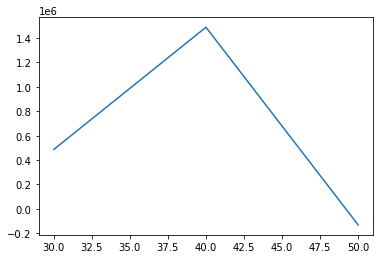

In [366]:
plt.plot(temp,diff1)